In [1]:
%matplotlib notebook
import numpy as np
import poppy
import matplotlib.pyplot as plt
import astropy.units as u
from llowfs import generate_wfe_array, simulate_multiple_llowfs
import h5py
import scipy.io

In [2]:
#size of output images is npix_detector
# oversample pads the pupil plane before performing ffts. This gives more accurate simulations of 
# image plane interactions. oversample=2 is generally too low for this application. 
# oversample=4 works well and doesn't take too long (see notebook'Oversample Comparison')
# 'coronagraph' can be 'vortex' or 'fqpm'. See 'Test Responses' notebook for more info.

oversample = 4
wavelength=632e-9*u.m
coronagraph='vortex'
npix_pupil = 512

npix_detector = 128
detector_fov = 0.3 #arcsec
detector_pixelscale = detector_fov/npix_detector
defocus = 4

In [3]:
highest_coeff = 15
rms_phase_mode = 100e-9

M = highest_coeff-1
wfe_array = np.zeros((M,M+1))

for i in range(M):
    wfe_array[i,i+1] = rms_phase_mode
print(wfe_array[:,:3])
    

[[0.e+00 1.e-07 0.e+00]
 [0.e+00 0.e+00 1.e-07]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]]


In [4]:
data = simulate_multiple_llowfs(wfe_array,None,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defocus,obscuration=True)

<IPython.core.display.Javascript object>


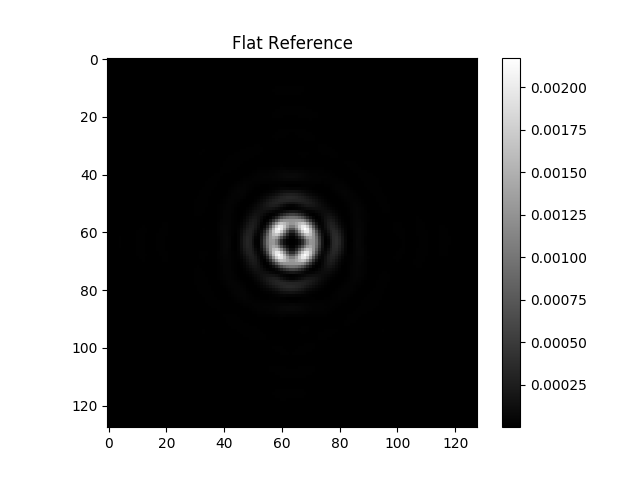

<IPython.core.display.Javascript object>


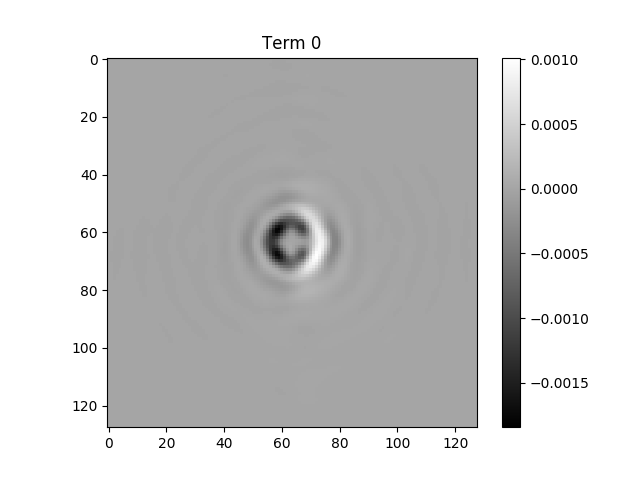

<IPython.core.display.Javascript object>


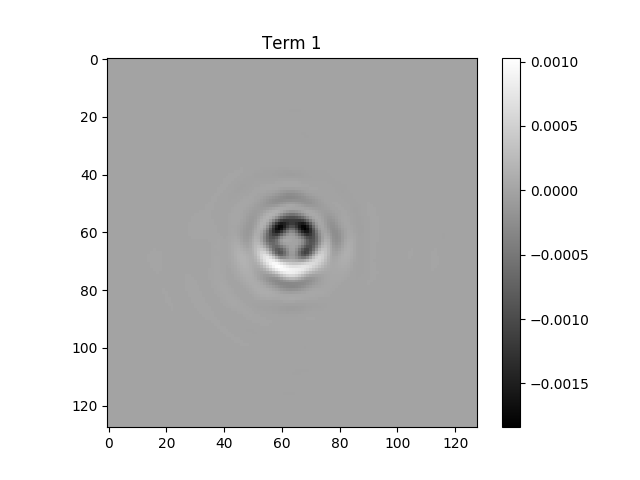

<IPython.core.display.Javascript object>


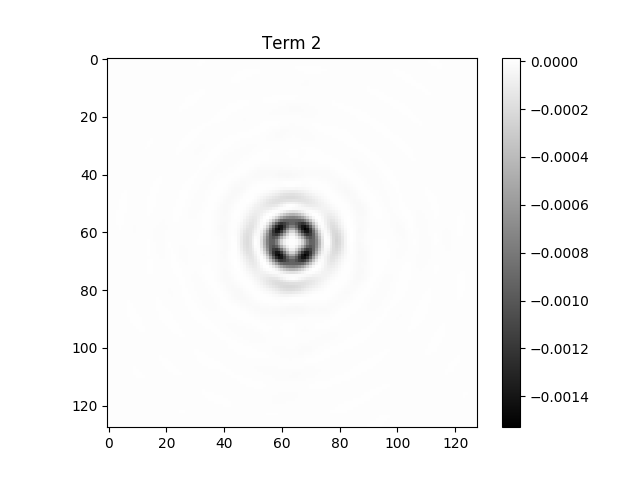

<IPython.core.display.Javascript object>


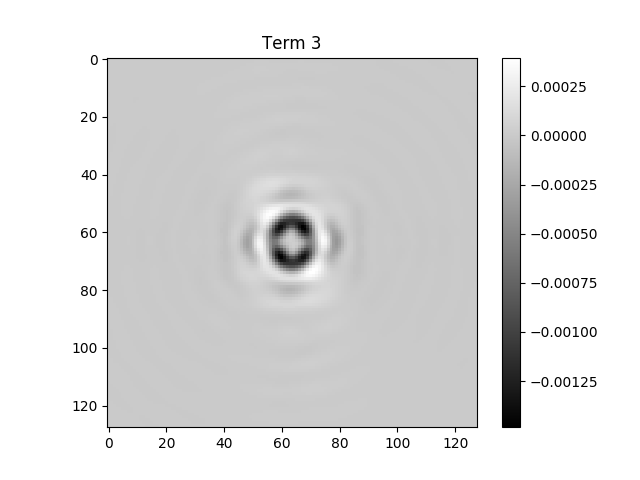

<IPython.core.display.Javascript object>


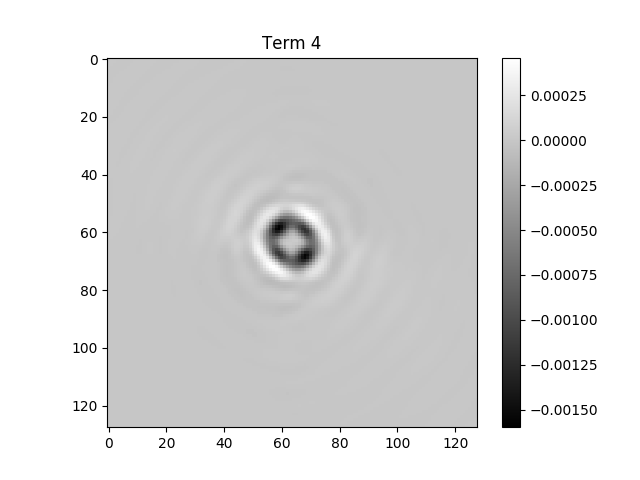

<IPython.core.display.Javascript object>


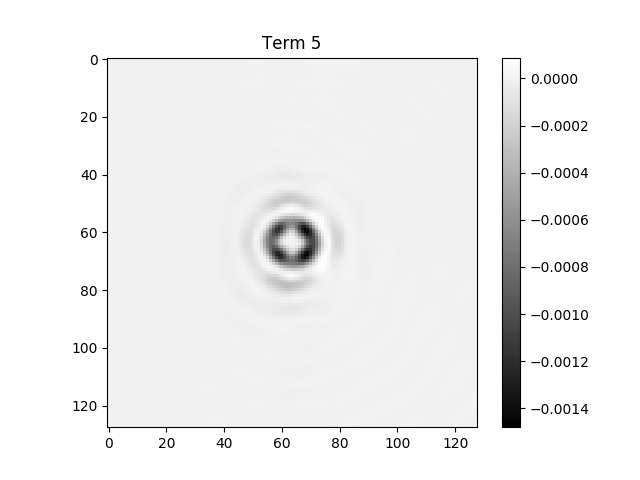

<IPython.core.display.Javascript object>


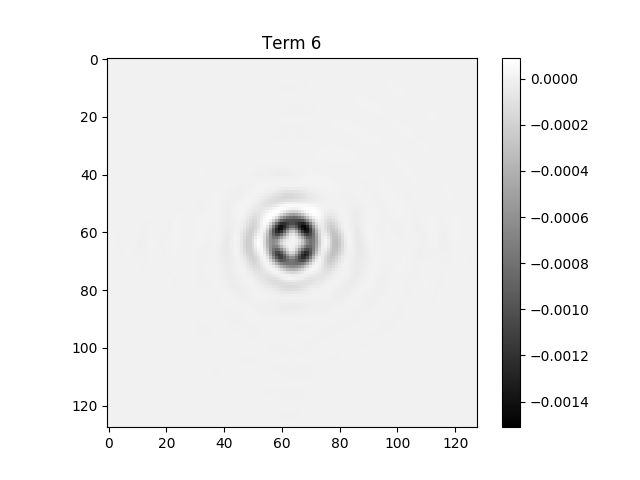

<IPython.core.display.Javascript object>


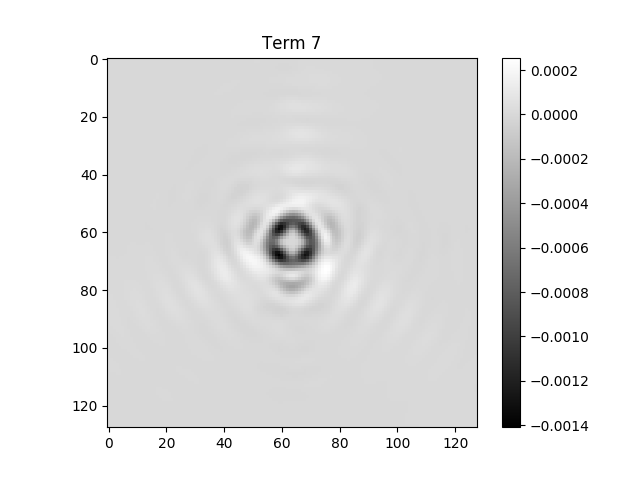

<IPython.core.display.Javascript object>


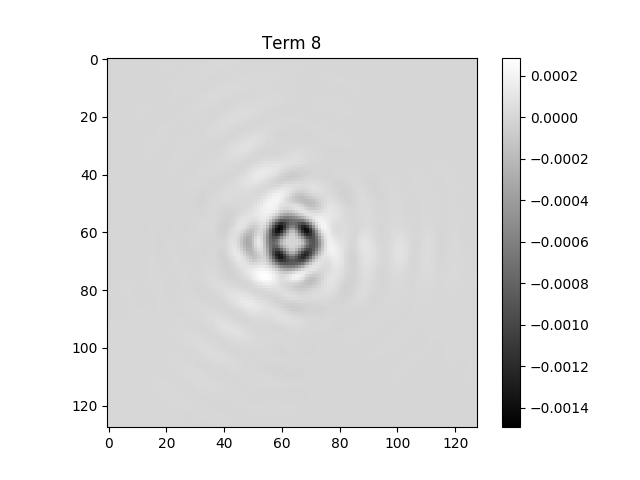

<IPython.core.display.Javascript object>


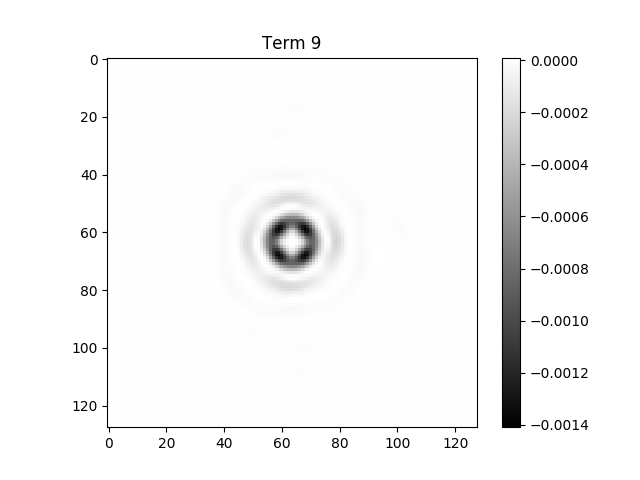

<IPython.core.display.Javascript object>


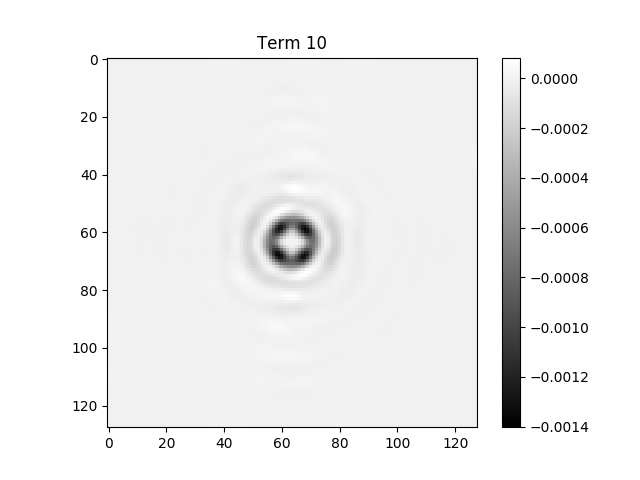

<IPython.core.display.Javascript object>


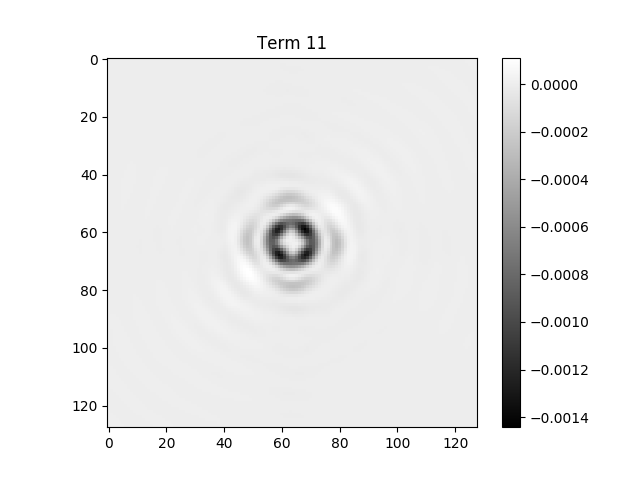

<IPython.core.display.Javascript object>


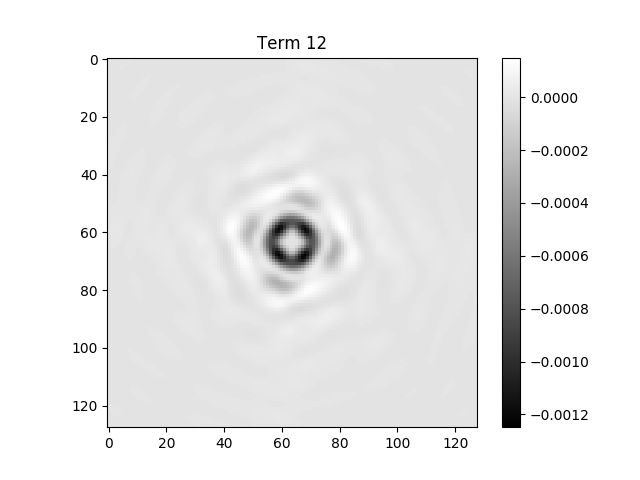

<IPython.core.display.Javascript object>


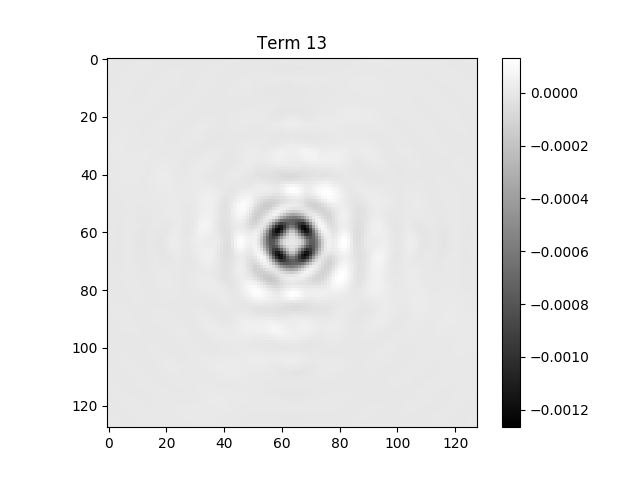

In [5]:
ref = data[:,:,0]
plt.figure()
plt.imshow(ref,cmap='gray')
plt.colorbar()
plt.title('Flat Reference')

N = npix_detector
modes = np.zeros((N,N,M))
for i in range(M):
    modes[:,:,i] = data[:,:,i+1]-ref
    plt.figure()
    plt.imshow(modes[:,:,i],cmap='gray')
    plt.colorbar()
    plt.title('Term '+str(i))
    

In [6]:
A = np.zeros((N**2,M))
for i in range(M):
    A[:,i] = np.reshape(modes[:,:,i],(-1,))

In [7]:
Apinv = np.linalg.pinv(A)
print(Apinv.shape)

(14, 16384)


In [8]:
testvec = modes[:,:,0].ravel()
print(testvec.shape)

(16384,)


In [9]:
np.dot(Apinv,testvec)

array([ 1.00000000e+00, -2.35564606e-15, -1.27415439e-15, -1.83186799e-15,
       -7.31836466e-17, -7.06466136e-16,  2.19442520e-16, -8.37383548e-16,
       -8.81347946e-16, -5.29090660e-16, -1.00261596e-15, -7.36823796e-16,
       -1.16801100e-15, -6.91612566e-16])

In [10]:
max_rms_phase = 50e-9
nEx = 100
step = 2*max_rms_phase/nEx

wfe_array_test = np.zeros((M,nEx))
for i in range(nEx):
    wfe_array_test[0,i] = -1*max_rms_phase + step*i
print(wfe_array_test[:,:3])
print(wfe_array_test[0,:])

[[-5.0e-08 -4.9e-08 -4.8e-08]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]]
[-5.0000000e-08 -4.9000000e-08 -4.8000000e-08 -4.7000000e-08
 -4.6000000e-08 -4.5000000e-08 -4.4000000e-08 -4.3000000e-08
 -4.2000000e-08 -4.1000000e-08 -4.0000000e-08 -3.9000000e-08
 -3.8000000e-08 -3.7000000e-08 -3.6000000e-08 -3.5000000e-08
 -3.4000000e-08 -3.3000000e-08 -3.2000000e-08 -3.1000000e-08
 -3.0000000e-08 -2.9000000e-08 -2.8000000e-08 -2.7000000e-08
 -2.6000000e-08 -2.5000000e-08 -2.4000000e-08 -2.3000000e-08
 -2.2000000e-08 -2.1000000e-08 -2.0000000e-08 -1.9000000e-08
 -1.8000000e-08 -1.7000000e-08 -1.6000000e-08 -1.5000000e-08
 -1.4000000e-08 -1.3000000e-08

In [11]:
test_data = simulate_multiple_llowfs(wfe_array_test,None,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defocus,obscuration=True)

<IPython.core.display.Javascript object>


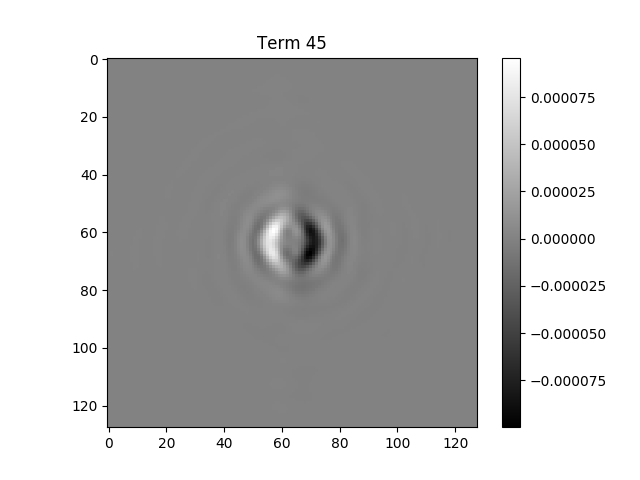

<IPython.core.display.Javascript object>


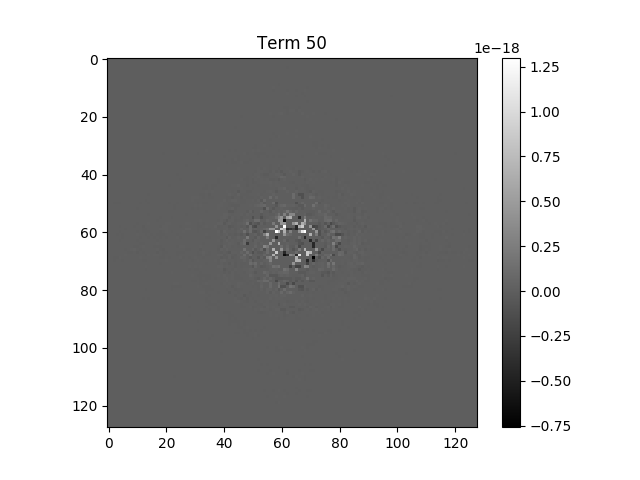

<IPython.core.display.Javascript object>


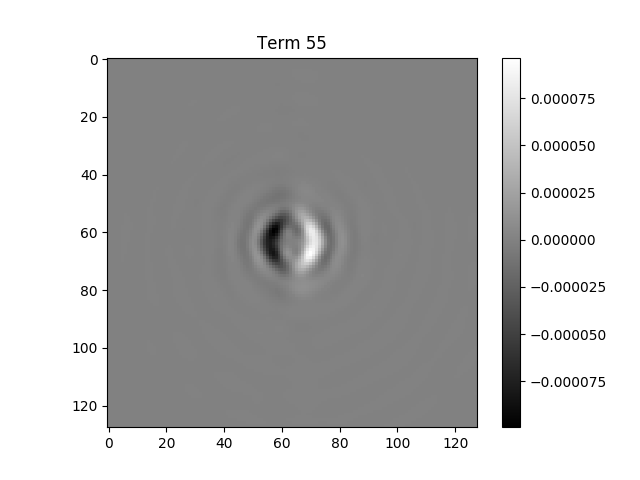

<IPython.core.display.Javascript object>


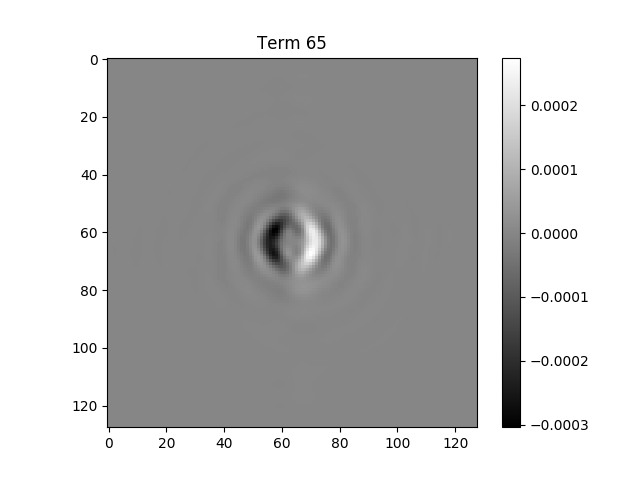

In [12]:
to_plot = [45,50,55,65]
for k in to_plot:
    plt.figure()
    plt.imshow(test_data[:,:,k]-ref,cmap='gray')
    plt.colorbar()
    plt.title('Term '+str(k))

In [13]:
test_results = np.zeros((nEx,M))

for i in range(nEx):
    pixels = (test_data[:,:,i]-ref).ravel()
    calc_coeffs = np.dot(Apinv,pixels)
    test_results[i,:] = calc_coeffs

In [14]:
print(test_results[50,:])

[-5.19328174e-17 -3.85363581e-17  7.26478044e-16  8.63047158e-17
 -6.36661612e-18  1.08472805e-16 -1.42617907e-16 -1.20919062e-17
 -5.66498939e-17 -1.13892564e-15  3.18473457e-17  2.70855587e-16
 -2.96490551e-17  3.29961152e-17]


<IPython.core.display.Javascript object>


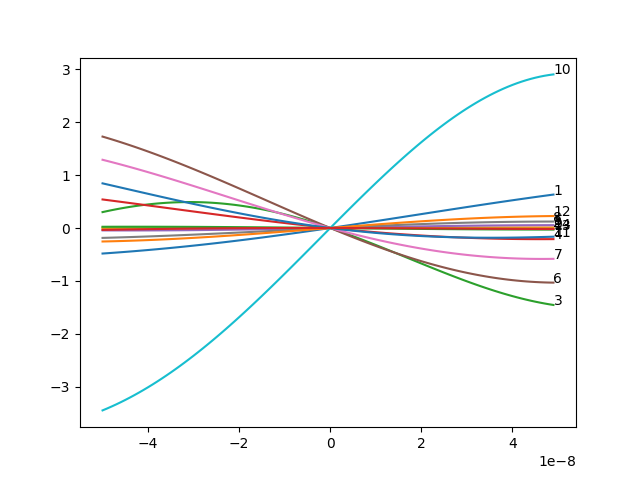

<function matplotlib.pyplot.show(*args, **kw)>

In [20]:
plt.figure()
to_plot = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
for i in to_plot:
    plt.plot(wfe_array_test[0,:],test_results[:,i])
    plt.text(wfe_array_test[0,-1],test_results[-1,i],str(i+1))
    #plt.plot([-50e-9,50e-9],[-50e-8,50e-8])
plt.show

In [19]:
file = 'fqpm_100nm_128px_individual_zernikes_def_4.hdf5'
#file = 'fqpm_50nm_256px_individual_zernikes.hdf5'
with h5py.File(file, 'r') as hf:
    coeffs = np.array(hf.get('zernike_coeffs'))
    images = np.array(hf.get('images'))
print(coeffs.shape)
print(images.shape)

(14, 560)
(128, 128, 560)


In [11]:
print(coeffs[:,:3])

[[-1.00000000e-07 -9.48717949e-08 -8.97435897e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [12]:
K = 40
coeffs_sep = np.zeros((M,K,M))

In [13]:
for i in range(M):
    coeffs_sep[:,:,i] = coeffs[:,i*K:(i+1)*K]

In [14]:
coeffs_sep[:,:3,0]

array([[-1.00000000e-07, -9.48717949e-08, -8.97435897e-08],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [15]:
rec_coeffs = np.zeros(coeffs_sep.shape)
for i in range(M): #loop over coefficients
    for j in range(K): #loop over examples
        vec = np.reshape(images[:,:,i*K+j]-ref,(-1,)) 
        rec_coeffs[:,j,i] = np.dot(Apinv,vec)

In [16]:
print(rec_coeffs[:,:3,0])

[[-4.32019002e+01 -4.49395346e+01 -4.62928065e+01]
 [-1.41340473e-01 -1.33006701e-01 -1.24150571e-01]
 [-3.88744661e+03 -3.77118738e+03 -3.61753933e+03]
 [ 6.31413775e+00  6.05301780e+00  5.74772917e+00]
 [ 3.06465820e+03  2.83693928e+03  2.60547335e+03]
 [ 2.34940645e+00  2.17170875e+00  1.99187332e+00]
 [-4.32755594e+01 -3.65741664e+01 -3.05099461e+01]
 [ 9.31285362e-01  8.64340936e-01  7.95914540e-01]
 [ 2.09302963e+01  1.84602134e+01  1.60855279e+01]
 [ 4.88950304e+03  4.72512433e+03  4.51864650e+03]
 [ 1.09763859e+02  1.08735277e+02  1.06262819e+02]
 [-3.49471230e+00 -3.37443317e+00 -3.22538212e+00]
 [ 1.89530502e+03  1.80381821e+03  1.70392822e+03]
 [ 2.84899104e+00  2.71306727e+00  2.56102858e+00]]


<IPython.core.display.Javascript object>


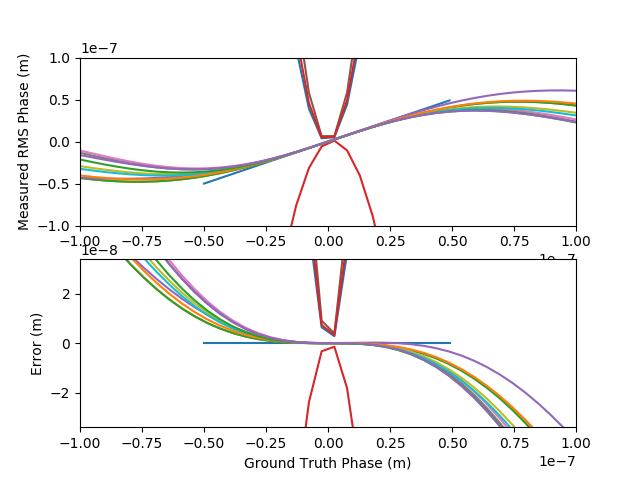

In [17]:
fig,ax = plt.subplots(2,1)
line1 = np.arange(-5e-8,5e-8,1e-9)
line0 = np.zeros(line1.shape)
ax[0].plot(line1,line1)
ax[1].plot(line1,line0)
for i in range(M):
#for i in [2,1,]:
    ax[0].plot(coeffs_sep[i,:,i],rec_coeffs[i,:,i]*rms_phase)
    #ax[0].axis('equal')
    ax[0].set_xlim([-100e-9,100e-9])
    ax[0].set_ylim([-100e-9,100e-9])
    ax[0].set_ylabel('Measured RMS Phase (m)')
    #ax[0].legend(['None','1','2','3','4','5','6'])
    ax[1].plot(coeffs_sep[i,:,i],rec_coeffs[i,:,i]*rms_phase-coeffs_sep[i,:,i])
    ax[1].axis('equal')
    ax[1].set_xlim([-100e-9,100e-9])
    ax[1].set_ylim([-10e-9,10e-9])
    ax[1].set_ylabel('Error (m)')
    ax[1].set_xlabel('Ground Truth Phase (m)')

In [18]:
truth = np.zeros((K,M))
reconstruction = np.zeros((K,M))
for i in range (M):
    truth[:,i] = coeffs_sep[i,:,i]
    reconstruction[:,i] = rec_coeffs[i,:,i]
    
mat_out = {
    'truth':truth,
    'reconstruction':reconstruction
}

scipy.io.savemat('linear_llowfs',mat_out)

<IPython.core.display.Javascript object>


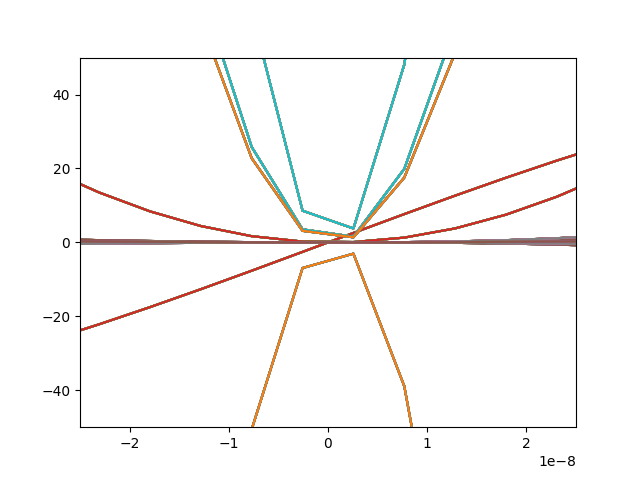

<IPython.core.display.Javascript object>


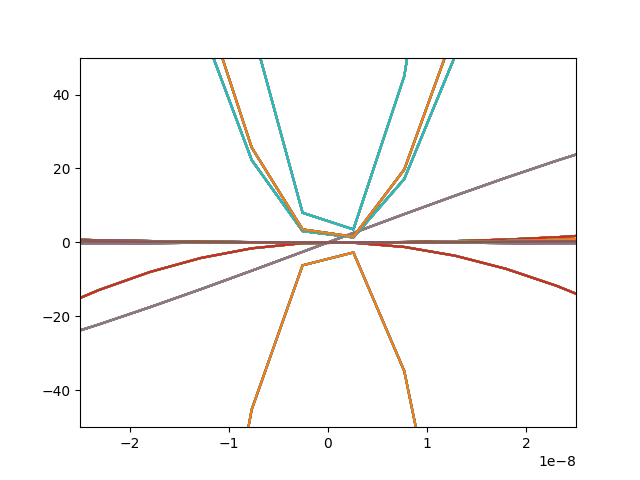

<IPython.core.display.Javascript object>


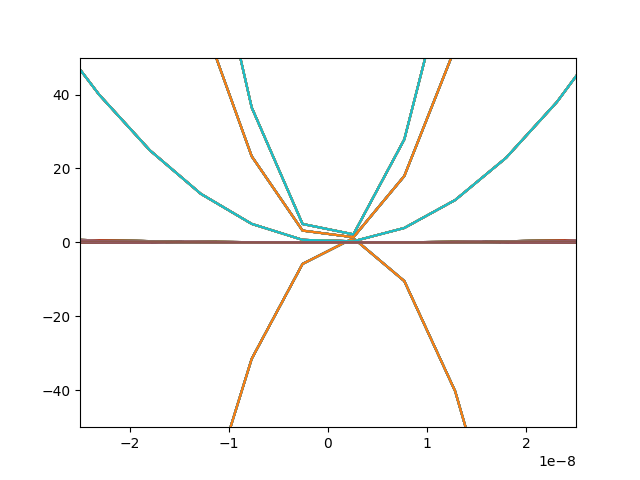

<IPython.core.display.Javascript object>


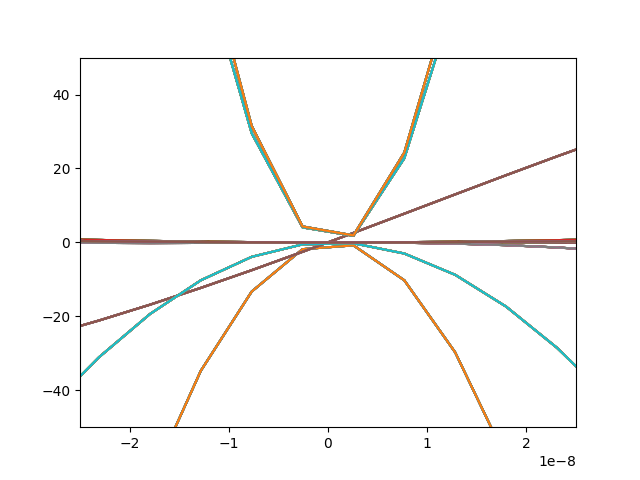

<IPython.core.display.Javascript object>


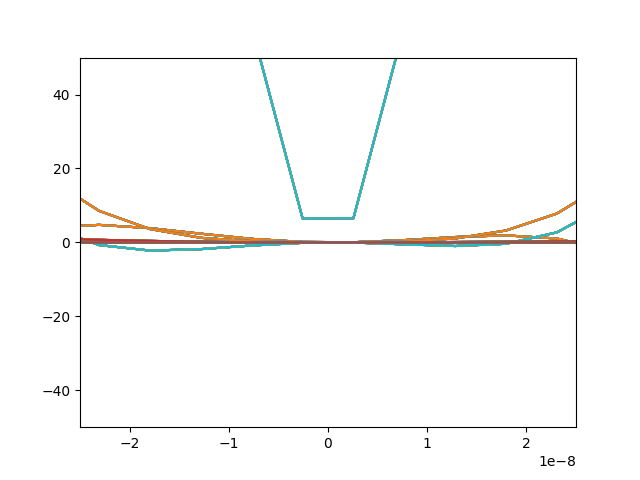

<IPython.core.display.Javascript object>


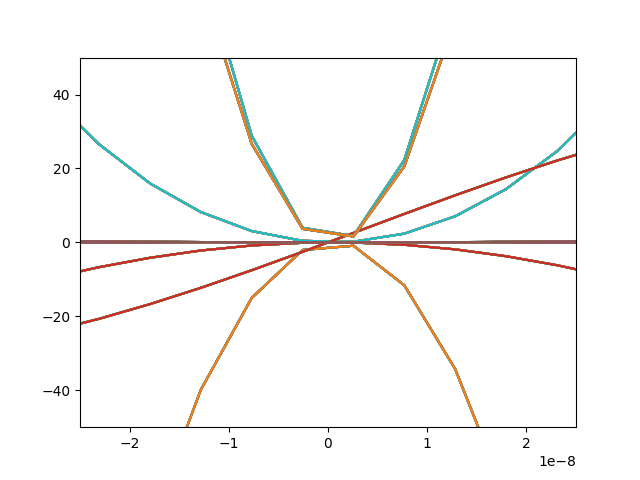

<IPython.core.display.Javascript object>


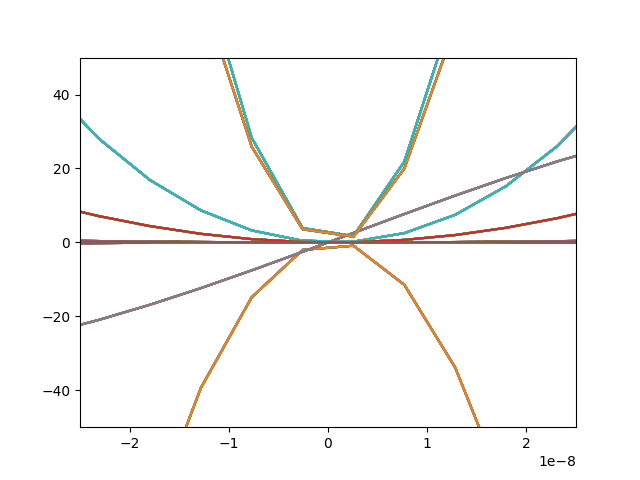

<IPython.core.display.Javascript object>


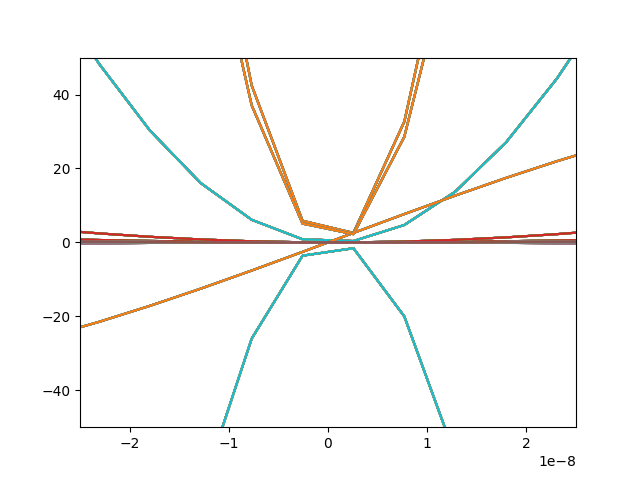

<IPython.core.display.Javascript object>


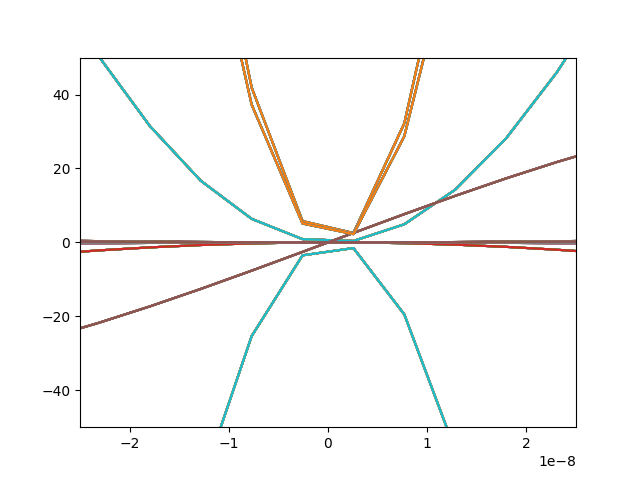

<IPython.core.display.Javascript object>


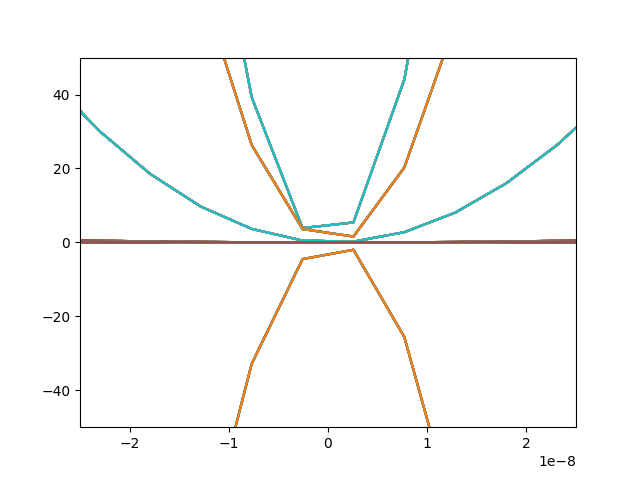

<IPython.core.display.Javascript object>


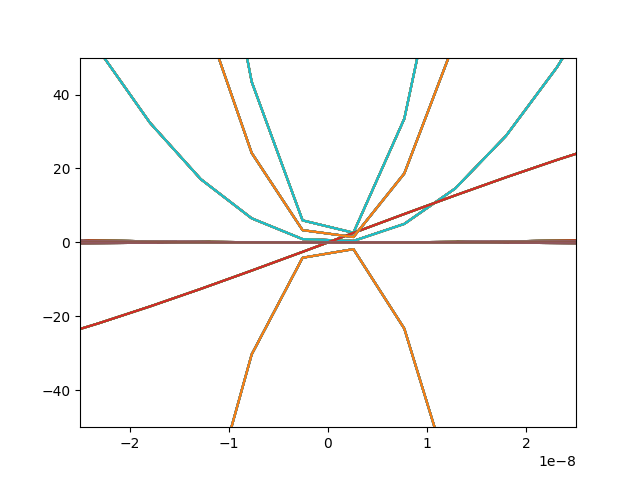

<IPython.core.display.Javascript object>


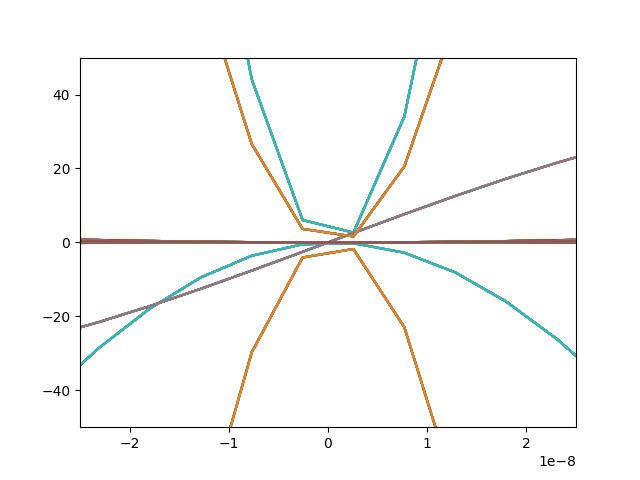

<IPython.core.display.Javascript object>


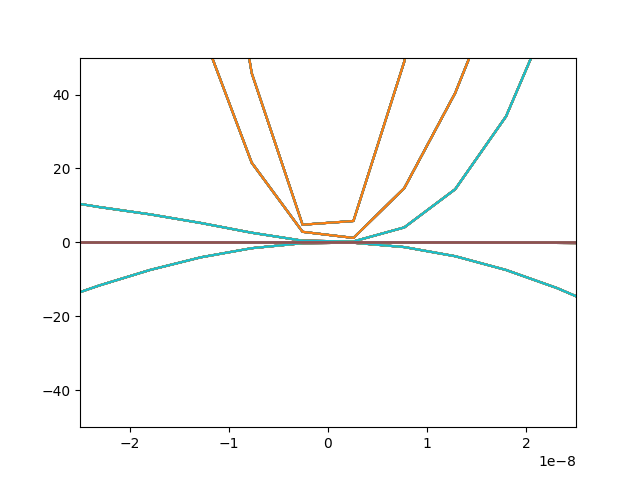

<IPython.core.display.Javascript object>


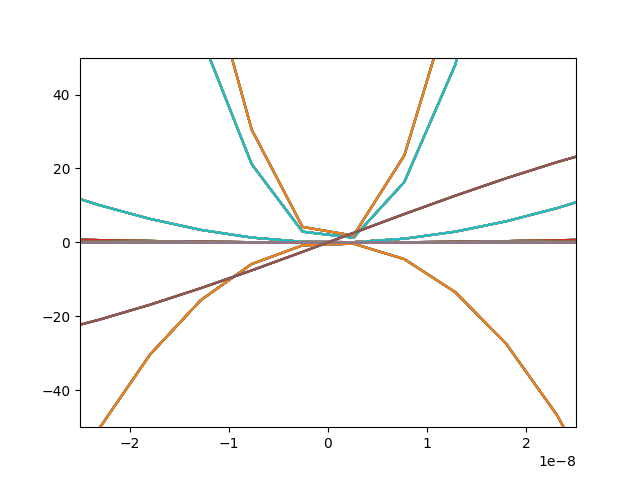

In [24]:
for i in range(M): #loop over coefficients
    plt.figure()
    #for j in range(K): #loop over examples
    truth[:,i] = coeffs_sep[i,:,i]
    for k in range(M): 
        resultsvec = rec_coeffs[k,:,i]
        plt.plot(truth,resultsvec)
        plt.xlim([-25.0*1e-9,25.0*1e-9])
        plt.ylim([-50,50])